<a name="top"></a>
# Table of Contents
- [3. Unsupervised Learning](#3)
    - [3.1 Unsupervised vs supervised learning](#3_1)
    - [3.2 Introductory examples](#3_2)
    - [3.3 Unsupervised Learning approaches](#3_3)
        - [3.3.1 Clustering](#3_3_1)
            - [K-Means Clustering](#3_3_1_1)
            - [Hierarchical Clustering](#3_3_1_2)
            - [Difference between K Means and Hierarchical clustering](#3_3_1_3)
        - [3.3.2 Dimensionality Reduction](#3_3_2)
            - [PCA](#3_3_2_1)
            - [t-SNE](#3_3_2_2)
    - [3.4 Advantages and Challenges](#3_4)
    - [3.5 Exercises](#3_5)


# 3. Unsupervised Learning<a name="3"></a>

The most common tasks within unsupervised learning are clustering, dimension reduction, and density estimation. In all of these cases, we wish to learn the inherent structure of our data without using explicitly-provided labels.



## 3.1. Unsupervised vs. supervised learning<a name="3_1"></a>

In comparison to supervised learning, in the setting of unsupervised learning we observe observations with feature vectors
$x_i = (x_{i,1},\dots,x_{i,n})$ for $i=1,\dots,p$
but no associated labels $y_i$ - the response variable is missing.
<img alt="AI" src="../img/3/schema.jpg" width="400" />
Nevertheless we want to gain insight in the **relationship between the variables** itself as well as **between the observations**.
Generally speaking we want to understand the underlying hidden structures within the observed data.

In unsupervised learning, attempts are made to **detect patterns** directly from the available example as no labelled datasets are provided. 

<img src="../img/3/supvsunsup.png" alt="Supervised_vs_Unsupervised" width="450" />

Source: [beta.cambridgespark.com](http://beta.cambridgespark.com/courses/jpm/01-module.html)

The left plot is an example of supervised learning; regression techniques are used to find the line of best fit between the features. In unsupervised learning, the inputs are segregated based on features and the prediction is based on which cluster it belongs to.

From a probabilistic point of view, supervised learning tries to infer a conditional probability distribution $P_X(x \mid y)$ whereas unsupervised learning intends to infer an a priori distribution $P_X(x)$.







## 3.2. Introductory examples<a name="3_2"></a>




### Example 1: Density estimation
Estimation of probability density functions is a central application of unsupervised learning, e.g. histograms and kernel density estimators:
<img src="../img/3/density_estimation.png" width="400" />

Source: Yen-Chi Chen, STAT 425: Introduction to Nonparametric Statistics, Winter 2018, chapter 6.1, University of Washington





### Example 2

- **Supervised setup:**
You get a bunch of photos of animals with information about what species is on them and then you train a model to recognize new photos.
- **Unsupervised setup:**
You have a bunch of photos of 4 species but without information about which species is on which one and you want to divide this dataset into 4 piles, each with the photos of one species.



<img alt="Customer Segmentation" src="../img/3/unsupervisedexample.png" width="500" />





### Applications of unsupervised learning

- Market segmentation: An advertising platform **segments the population into smaller groups** which similar characteristics e.g. similar demographics, lifestyles, and purchasing habits so that advertisers can reach their target market with relevant ads. This helps advertisers to understand their existing customer base and use their ad spend effectively by targeting potential new customers.

<img alt="Customer Segmentation" src="../img/3/customer-segmentation.jpg" width="400" />

Source: [www.analyticsvidhya.com](https://www.analyticsvidhya.com/blog/2018/05/essentials-of-deep-learning-trudging-into-unsupervised-deep-learning/)

- E.g. segmentation exchange members
-  **Association**: Finding correlated features in order to infer other unknown characteristics
- Companies like Airbnb group housing listings in order to make better recommendations 
- **Reducing dimensionality** of datasets in order to support visual inspection and/or reduce computational costs.




















### 3.3. Unsupervised Learning approaches<a name="3_3"></a>
* **Clustering** (Segmentation): Splitting the dataset into groups according to similarity
* **Dimensionality Reduction** (Compression)
<img alt="Customer Segmentation" src="../img/3/unsupervisedvssupervised.jpg" width="400" />



* Anomaly Detection: Discover unusual data points in your dataset e.g. Fraud detection
* Association mining: Infer unknown characteristics of items within one cluster
* Other algorithms: Autoencoders, Deep Belief Nets, Generative Adversarial Networks (GANs), Self-Organizing maps







### 3.3.1 Clustering<a name="3_3_1"></a>

In clustering, we are trying to partition the data into several distinct **subgroups**, also called clusters, according to similar features. Items within a cluster are more similar to each other than items in other clusters. It's up to us to interpret the results: value is created when humans create meaning using the findings.

Recall the customer segmentation example. Customers can be divided into groups according to certain features (e.g. age, gender, zip code, family income, user history).
Clustering algorithms can find natural groupings in data, if they exist.

<img src="../img/3/clusters.jpeg" alt="clusters"/>

Source: https://medium.com/the-21st-century/machine-learning-a-strategy-to-learn-and-understand-chapter-3-9daaad4afc55

The left image shows raw data; the right plot shows clustered data. A new input is classified into one of these clusters based on features and a prediction is made.

There are several clustering algorithms. We'll explore two of the most common ones: **k-Means clustering** and **Hierarchical clustering**.



#### Generate some data:  Make your own random clusters



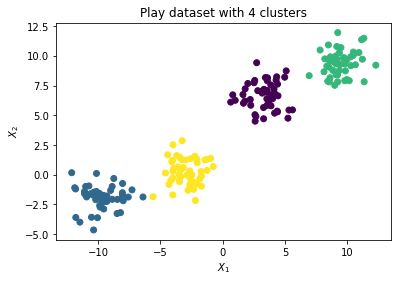

In [36]:
# import libraries
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# create blobs
n_true_clusters = 4
data = make_blobs(n_samples=200, n_features=2, centers=n_true_clusters, cluster_std=1.1)

X, y = data[0],  data[1]

# create scatter plot
plt.scatter(X[:,0], X[:,1], c=y, edgecolor=None)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.title("Play dataset with {} clusters".format(n_true_clusters))
plt.show()






#### 3.3.1.1 K-Means Clustering <a name="3_3_1_1"></a>

K-Means divides data points into **K mutually exclusive clusters**. Choosing the desired number for K can be difficult. A larger K creates smaller groups with more granularity, a smaller K results larger groups and less granularity.
If we know that there are 2 classes involved, we tell the algorithm to find 2 clusters. 

##### Objective:
* Let $C_1,\dots, C_K$ denote sets containing the indices of the observations.
* Let $W(C_k)$ be a measure of how different data points are within cluster $C_k$
* Minimize within-cluster variation:
$$minimize_{C_1,\dots,C_K} \Big\{ \sum_{k=1}^{K} W(C_k)\Big\}$$

* Using squared Euclidean norm as distance measure:
$$W(C_k) = \frac{1}{ |C_k|} \sum_{i,i' \in C_k}  \sum_{j=1} ^{p} (x_{i,j}-x_{i',j})^2$$

* Difficult to solve optimization problem but the following simple algorithm provides a local optimum. 

##### Algorithm:

<table>
    <tr>
        <td width=30% style="text-align:left; LINE-HEIGHT:200%">
            Steps in k-means clustering:
            <ol>
              <li>Initialize k centroids at random.</li>
              <li>Assign each data point to one of the k clusters. Measure of "nearness" is a hyperparameter — often Euclidean distance.</li>
              <li>Move the centroids to the center of their respective clusters. The new position of each centroid is calculated as the average position of all the points in its cluster.</li>
                <li>Keep repeating steps 2 and 3 until the centroids stop moving a lot at each iteration, until the algorithm converges.</li>
            </ol>
        </td>
        <td>
            <img src="../img/3/kmeans_algo.png" />
            modified after this <A href="http://www.youtube.com/watch?v=_aWzGGNrcic">youtube video</A>
        </td>
    </tr>
</table>


##### Algorithm (slightly different initialization step)
<img src="../img/3/kmeans_algo2.png" />

Source: An Introduction to Statistical Learning, Trevor Hastie, Robert Tibshirani

* Since the algorithm gives only a local optimum rather than a global one, the obtained result depends on initial randomly assigned cluster centroids.


* One application of k-means clustering is **classifying handwritten digits**. Suppose we have digits' images as vectors of pixel brightnesses. Let's say the images are black and white with 64x64 pixels. Each pixel represents a dimension. k-means clustering allows us to group the images that are close together, achieving good results for digit recognition.


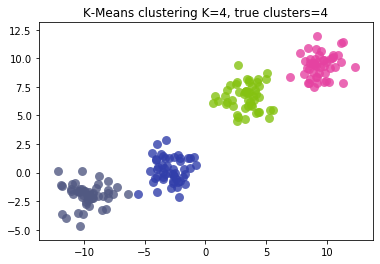

In [39]:
# Importing Modules
from sklearn.cluster import KMeans
import random

K=4
# Declaring Model
model = KMeans(n_clusters=K)

# Fitting Model
model.fit(X)

# Prediction on the entire data
y_predict = model.predict(X)


# make lists of colors for plotting
random.seed(43)
def random_color_list(length=10):
    return ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(length)]

random_colors_y = random_color_list(len(set(y)))
random_colors_p = random_color_list(len(set(y_predict)))

plt.title("K-Means clustering K={}, true clusters={}".format(K, n_true_clusters))
for xi, yi, cy, cp in zip(X[:,0], X[:,1], y, y_predict):
    plt.scatter(xi, yi, c=random_colors_p[cp], edgecolors=None , linewidths=0, alpha=0.8, s=80)











#### 3.3.1.2 Hierarchical Clustering<a name="3_3_1_2"></a>

Alternative approach which doe snot require to define K, the number of clusters, beforehand. In fact hierachical clustering provides you with tree-based hierarchical structur of sub groups, called **dentrogram**.

1. **Bottom-up** or agglomerative clustering. 
    - This is the most common type of hierarchical clustering, 
    - It is agglomerative (a dendrogram is built starting from the leaves)
2. **Top-down** or divisive clustering. 
    - It is divisive (a dendrogram is built starting from the trunk)

<img src="../img/3/hclust.jpg" width="600" />


##### Bottom Up
All the data points are assigned to individual clusters. Then the 2 closest clusters are joined into one. The algorithm ends when there is only one single cluster left. The completion of hierarchical clustering is shown using **dendrograms**. 

It clusters data points into **parent** and **child clusters**. We can divide our customers into younger and older ages, and then split each of those groups into further individual clusters as well. In addition to cluster assignments, we also build a nice tree that tells us about the hierarchies between the clusters. We can then pick the number of clusters we want from this tree.

Hierarchical clustering is similar to regular clustering, except that you build a hierarchy of clusters. This is useful if you want flexibility in how many clusters you ultimately want.

Here are the steps for hierarchical clustering:
1. Start with N clusters, one for each data point.
2. Merge the two clusters that are closest to each other. Now you have N-1 clusters.
3. Recompute the distances between the clusters. There are several ways to do this.
4. Repeat steps 2 and 3 until you get one cluster of N data points. You get a tree (also known as a dendrogram) like the one below.
5. Pick a number of clusters and draw a horizontal line in the dendrogram.

Two open issues:
  1. What means close?
  2. How do measure the distance between clusters?
  
**To 1:** Define **dissimilarity measure** to measure distance between two data points; most often Euclidean distance.
  
**To 2:** Extend the definition of dissimilary measure to group of data points: linkage-types:

<img src="../img/3/linkagetypes.png" width="500" />

* The resulting dendrogram depends strongly on the choice of the dissimilarity measure and linkage.
* E.g. correlation-based distance for clutering customers based on their shopping history
* Consider scaling of data points (mean zero, standard deviation 1)
* "With these methods, there is no
single right answer—any solution that exposes some interesting aspects of
the data should be considered." (Trevor Hastie, Robert Tibshirani)


##### Example of hierarchical clustering of grain data. 

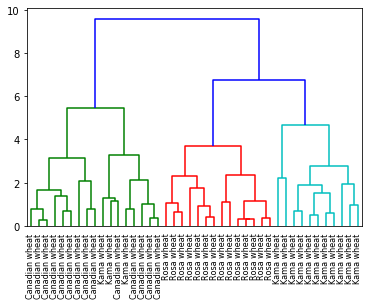

In [42]:
# Importing Python Modules
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# Reading the DataFrame
# "https://raw.githubusercontent.com/vihar/unsupervised-learning-with-python/master/seeds-less-rows.csv"

seeds_df = pd.read_csv("../datasets/3/seeds-less-rows.csv")


# Remove the grain species from the DataFrame, save for later
varieties = list(seeds_df.pop('grain_variety'))

# Extract the measurements as a NumPy array
samples = seeds_df.values

"""
Perform hierarchical clustering on samples using the
linkage() function with the method='complete' keyword argument.
Assign the result to mergings.
"""
mergings = linkage(samples, method='complete')

"""
Plot a dendrogram using the dendrogram() function on mergings,
specifying the keyword arguments labels=varieties, leaf_rotation=90,
and leaf_font_size=6.
"""
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=8,
           )

plt.show()













#### 3.3.1.3 Difference between K Means and Hierarchical clustering<a name="3_3_1_3"></a>

* Hierarchical clustering can't handle **big data** well but K means clustering can. This is because the time complexity of K means is linear i.e. $O(n)$ while that of hierarchical clustering is quadratic i.e. $O(n^2)$.

* Results are **reproducible** in hierarchical clustering. In K means clustering, as we start with an arbitrary choice of clusters, the results generated by running the algorithm multiple times might differ. 

* K means is found to work well when the **shape of the clusters** is hyper spherical (like circle in 2D, sphere in 3D).

* K-Means doesn't allow **noisy data**, while in hierarchical we can directly use noisy dataset for clustering.

* Hierarchical clustering tends to produce **more accurate** results compared to k-means clustering. The downside is that hierarchical clustering is more difficult to implement and more time/resource consuming than k-means.







### 3.3.2 Dimensionality Reduction<a name="3_3_2"></a>

Running algorithms on only data that's necessary is sensible. Unsupervised learning can help with dimensionality reduction and reduce data complexity while maintaining data structure and usefulness. Reducing dimensionality of data is an important part of a good machine learning pipeline and resembles compression. In computer vision, reducing the size of training set by an order of magnitude by running algorithms on images would significantly lower compute and storage costs while making models run faster. 

Dimensionality reduction (dimensions or how many columns are in your dataset) assumes that a lot of data is redundant (meaning being highly correlated), and that most of the information in a dataset can be fairly well approximated by only a fraction. This means combining parts of the data to convey maximum information. 

- Principal Component Analysis (PCA): finds the linear combinations that conveys most of the variance in your data.
- Singular-Value Decomposition (SVD): decomposes data into product of smaller matrices.

These methods use linear algebra to break down a matrix into more informatory pieces.

We'll take a look at one common technique in practice: Principal component analysis (PCA).





#### 3.3.2.1 Principal Components Analysis<a name="3_3_2_1"></a>


PCA is a statistical procedure that uses a transformation to convert a set of observations of possibly correlated variables into a set of values of **linearly uncorrelated variables**, that explains most of the variability of the original set, called **principal components**.

This transformation is defined in such a way that the **first principal component** has the *largest possible variance* , and **each succeeding component** in turn has the *highest variance possible* under the constraint that it is orthogonal to the preceding components. 
<A href="https://en.wikipedia.org/wiki/Principal_component_analysis">wikipedia PCA</A>

**Goal:** Find a low-dimensional representation of the data which captures most of the information.

* Let's consider $n$ observation from a $p$-dimensional space
* Let $X_1, \dots, X_p$ be the the set of features.
* Define the **first principal component $Z_1$** as the normilized linear combination
$$Z_1 = \sigma_{1,1} X_1 + \sigma_{2,1} X_2 + \dots + \sigma_{p,1} X_p$$
with
$$\sum_{j=1}^p \sigma_{j,1}^2 = 1$$
* w.l.o.g. assume $X_1,\dots,X_p$ have mean zero
* $\sigma_{1,1}, \dots, \sigma_{p,1}$ are called loadings of the first principal component
* First principal compoment in vector-matrix notation:
$$z_{i,1} = \sigma_{1,1}x_{i,1} + \sigma_{2,1}x_{i,2} + \dots +  \sigma_{p,1}x_{i,p} $$
* Recalling that the first compoment should have the largest variance, determining the first principal component becomes the following optimization problem:
$$maximize_{\sigma_{1,1},\dots,\sigma_{p,1}} \Big\{  \frac{1}{n} \sum_{i=1}^n \Big(  \sum_{j=1}^p\sigma_{j,1}x_{i,j}  \Big)^2  \Big\} \qquad \text{ subject to } \qquad \sum_{j=1}^p \sigma_{j,1}^2 = 1$$
* After rearrangement this can be solved via an eigen decomposition (here out of scope)
* This maps the input data from an $nxp$ space to an new $nxp$ space.

The subset of principal components we select will constitute a new space that is smaller in dimensionality than the original space but maintains as much of the complexity of the data as possible. PCA remaps the space in which our data exists.

<img src="../img/3/pca_2comp.png" width="500" alt="pca_2comp" />

The loading vector $\sigma_1$ of the first principal component defines the direction in the feature space along which the data vary the most. 







##### Example 
The original Iris dataset contains data about 3 spacies of iris (setosa, versicolor,virginica). It has 5 columns: sepal length, sepal width, petal length, petal width nd species.
    
<img src="../img/3/Iris_dataset_scatterplot.png" width="500" alt="" />

The following code projects the original data which is 4 dimensional (${x_1,x_2,x_3,x_4}$) into 2 dimensions (${z_1,z_2}$). After dimensionality reduction, there isn’t a particular meaning assigned to each principal component typically.
The new components are just the 2 main dimensions of variation. 

After plotting the data in the new dimensions(${z_1,z_2}$), the different classes seem well separated from each other.

The **explained variance**  tells us how much information (variance) can be attributed to each of the principal components. This is important as converting 4 dimensional space to 2 dimensional space can lose some of the variance (information). Here, the first principal component contains 92.46% of the variance and the second principal component contains 5.30% of the variance. Together, the two components contain 97.76% of the total information.

explained variance ratio (first two components): [0.92461872 0.05306648]


<Figure size 432x288 with 0 Axes>

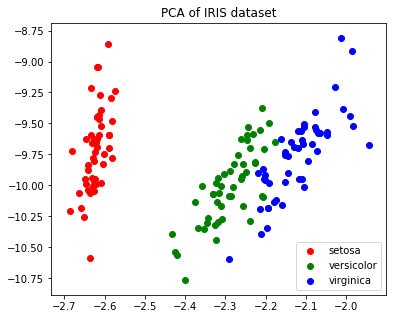

In [8]:
from sklearn import datasets
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline
# Load the iris data
iris = datasets.load_iris()

X = iris.data
y = iris.target


min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)


# Fit a PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

# Project the data in 2D
X_pca = pca.transform(X_scaled)

# Visualize the data
plt.figure()
lw = 2 
target_ids = range(len(iris.target_names))
plt.figure(figsize=(6, 5))
for i, c, label in zip(target_ids, 'rgbcmykw', iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
               c=c, label=label)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()



#### 3.3.2.2  t-SNE<a name="3_3_2_2"></a>

t-SNE (t-distributed stochastic neighbor embedding) is one of the unsupervised learning methods for visualisation. It maps high dimensional space into a 2 or 3 dimensional space which can be visualised. Specifically, it models each high-dimensional object by a 2 or 3-dimensional point in such a way that similar objects are modelled by nearby points and dissimilar objects are modelled by distant points with high prob 2-dimensional figure. 



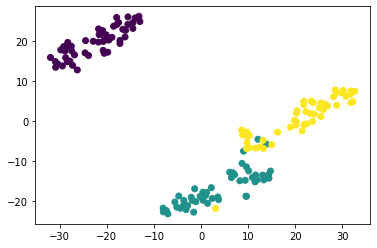

In [22]:
# Importing Python Modules
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

# Loading dataset
iris_df = datasets.load_iris()

# Defining Model
model = TSNE(learning_rate=100, perplexity=12, n_components=2)

# Fitting Model and transforming the data
transformed = model.fit_transform(iris_df.data)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()







## 3.4 Advantages and Challenges<a name="3_4"></a>

###  3.4.1. Advantages
    
* Supervised learning is **constrained by the biases** in which it is being supervised in; it cannot think of other corner cases that could occur when solving the problem.

* Also, huge manual **effort is required to create labels** in supervised learning. The less the number of labels created, less is the training that can be perform for your algorithm.





###  3.4.2. Challenges 

Unsupervised learning presents a unique challenge: it's difficult to know if we're getting the right answers without an answer key. In supervised learning, metrics like precision and recall reveal how accurate our model is, and model parameters are tuned to improve accuracy scores. **With absence of labels in unsupervised learning, we can't objectively measure how accurate our algorithm is.** How do we know if K-Means found the right clusters or even the right number of clusters? 

If unsupervised learning is right for the job, depends on your business context. "Performance" is often subjective and domain-specific. There is no universally accepted mechanism for performance cross validtion. Unsupervised learning is often used as part of **exploratory data analysis**. In customer segmentation, clustering will only work well, if your customers actually do split into natural groups. One of the best but risky ways to test an unsupervised learning model is by implementing it in the real world and seeing what happens. Designing an A/B test, with and without the clusters our algorithm outputted, can be an effective way to see if it's useful information or totally incorrect.






## 3.5 Exercises<a name="3_5"></a>
1. K Means Clustering <A href="#3_3_1">(go up)</A>  documentation on K-Means <A href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">K-Means doc</A>: 
    - Play around with these parameters: **true_clusters** and **K**.<br/> What happens if you guess the right number of clusters with **K = true_clusters** and **otherwise**?
    - Change **cluster_std** when generating data. <br>This will make the clusters more dispersed and it will be more difficult for the model to separate them.
    - K Means might give you **different results** each time you run it. <br>Try to observe this behaviour. How can you avoid this in your code? <br><br>
2. t-SNE <a href="#3_3_2_2">(go up)</a> documenation on t-SNE: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html"> sklearn doc</a>
    - Play around with these parameters: **perplexity** and **learning rate**.  <br>
    Find a combination of both that gives you the **best separation** of the iris species.



## Learning Material<a name="3_6"></a>
- https://towardsdatascience.com/unsupervised-learning-with-python-173c51dc7f03
- https://scikit-learn.org/stable/tutorial/statistical_inference/unsupervised_learning.html
- https://www.analyticsvidhya.com/blog/2018/05/essentials-of-deep-learning-trudging-into-unsupervised-deep-learning/
- https://www.coursera.org/lecture/machine-learning/unsupervised-learning-olRZo
- https://www.datacamp.com/courses/unsupervised-learning-in-python
- https://www.kaggle.com/sashr07/unsupervised-learning-tutorial
